In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
legend_properties = {'weight':'bold'}

In [8]:
data_folder = r"E:\data\dao-0310-23\V4_4\Turbulence_Grid_2\Turbulence_50_0.35"
dao_performance_file = data_folder + r"\dao_performance_across_turbulence_time"
hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turbulence_time"
autonomy_performance_file = data_folder + r"\autonomy_performance_across_turbulence_time"

dao_diversity_file = data_folder + r"\dao_diversity_across_turbulence_time"
hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turbulence_time"
autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turbulence_time"

dao_variance_file = data_folder + r"\dao_variance_across_turbulence_time"
hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_turbulence_time"
autonomy_variance_file = data_folder + r"\autonomy_variance_across_turbulence_time"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(hierarchy_performance_file, 'rb') as infile:
    hierarchy_performance = pickle.load(infile)
with open(autonomy_performance_file, 'rb') as infile:
    autonomy_performance = pickle.load(infile)

with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(hierarchy_diversity_file, 'rb') as infile:
    hierarchy_diversity = pickle.load(infile)
with open(autonomy_diversity_file, 'rb') as infile:
    autonomy_diversity = pickle.load(infile)

with open(dao_variance_file, 'rb') as infile:
    dao_variance = pickle.load(infile)
with open(hierarchy_variance_file, 'rb') as infile:
    hierarchy_variance = pickle.load(infile)
with open(autonomy_variance_file, 'rb') as infile:
    autonomy_variance = pickle.load(infile)

In [9]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

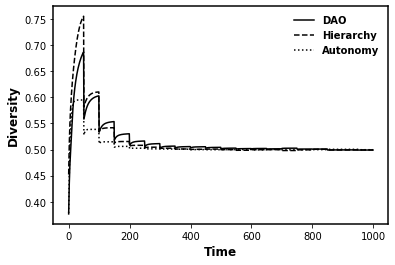

<Figure size 432x288 with 0 Axes>

In [10]:
# Performance
x = range(len(dao_performance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)

plt.plot(range(len(dao_diversity)), dao_performance, "k-", label="DAO")
plt.plot(range(len(hierarchy_diversity)), hierarchy_performance, "k--", label="Hierarchy")
plt.plot(range(len(autonomy_diversity)), autonomy_performance, "k:", label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Diversity', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\DHA_performance_50_0.35.png", transparent=True, dpi=300)
plt.show()
plt.clf()

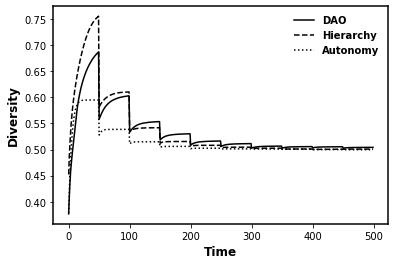

<Figure size 432x288 with 0 Axes>

In [11]:
# Performance
x = range(500)
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)

plt.plot(x, dao_performance[:500], "k-", label="DAO")
plt.plot(x, hierarchy_performance[:500], "k--", label="Hierarchy")
plt.plot(x, autonomy_performance[:500], "k:", label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Diversity', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(data_folder + r"\DHA_performance_50_0.35.png", transparent=True, dpi=300)
plt.show()
plt.clf()

In [13]:
import numpy as np
# 500
dao_performance_short = dao_performance[:500]
hierarchy_performance_short = hierarchy_performance[:500]
# If your series are Python lists, cast to numpy arrays
dao = np.asarray(dao_performance_short, dtype=float)
hier = np.asarray(hierarchy_performance_short, dtype=float)

# 1000
# dao = np.asarray(dao_performance, dtype=float)
# hier = np.asarray(hierarchy_performance, dtype=float)
# Optional: check lengths and align if needed
n = min(len(dao), len(hier))
dao, hier = dao[:n], hier[:n]

# Time axis: assume unit time steps t = 0,1,...,n-1
t = np.arange(n, dtype=float)

# 1) Signed area (positive ⇒ DAO > Hierarchy on average)
diff = dao - hier
signed_area = np.trapz(diff, t)                  # ∫ (DAO - Hier) dt
T = t[-1] - t[0] if n > 1 else 1.0               # horizon length
avg_signed_gap = signed_area / T                 # time-normalized average gap

# 2) Enclosed area (magnitude only; insensitive to who leads)
enclosed_area = np.trapz(np.abs(diff), t)        # ∫ |DAO - Hier| dt

# 3) Intersection points (linear interpolation between samples)
sign_change_idx = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) < 0)[0]
t_cross = []
for i in sign_change_idx:
    # Linear interpolation of zero crossing for diff between t[i] and t[i+1]
    # diff(t) = diff[i] + (diff[i+1]-diff[i]) * alpha; solve for diff(t)=0
    denom = (diff[i+1] - diff[i])
    if denom != 0:
        alpha = -diff[i] / denom
        t0 = t[i] + alpha * (t[i+1] - t[i])
        t_cross.append(t0)
t_cross = np.array(t_cross)

print(f"Signed area (DAO - Hier): {signed_area:.6f}")
print(f"Average signed gap per unit time: {avg_signed_gap:.6f}")
print(f'Enclosed area (∫|DAO-Hier| dt): {enclosed_area:.6f}')
print(f'Number of intersections: {len(t_cross)}')
if len(t_cross) > 0:
    print("Crossing times (approx.):", t_cross)


Signed area (DAO - Hier): -1.594678
Average signed gap per unit time: -0.003196
Enclosed area (∫|DAO-Hier| dt): 6.439375
Number of intersections: 1
Crossing times (approx.): [101.48443813]


In [ ]:
import numpy as np
# 500
dao_performance_short = dao_performance[:500]
hierarchy_performance_short = hierarchy_performance[:500]
# If your series are Python lists, cast to numpy arrays
dao = np.asarray(dao_performance_short, dtype=float)
hier = np.asarray(hierarchy_performance_short, dtype=float)

# 1000
# dao = np.asarray(dao_performance, dtype=float)
# hier = np.asarray(hierarchy_performance, dtype=float)
# Optional: check lengths and align if needed
n = min(len(dao), len(hier))
dao, hier = dao[:n], hier[:n]

# Time axis: assume unit time steps t = 0,1,...,n-1
t = np.arange(n, dtype=float)

# 1) Signed area (positive ⇒ DAO > Hierarchy on average)
diff = dao - hier
signed_area = np.trapz(diff, t)                  # ∫ (DAO - Hier) dt
T = t[-1] - t[0] if n > 1 else 1.0               # horizon length
avg_signed_gap = signed_area / T                 # time-normalized average gap

# 2) Enclosed area (magnitude only; insensitive to who leads)
enclosed_area = np.trapz(np.abs(diff), t)        # ∫ |DAO - Hier| dt

# 3) Intersection points (linear interpolation between samples)
sign_change_idx = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) < 0)[0]
t_cross = []
for i in sign_change_idx:
    # Linear interpolation of zero crossing for diff between t[i] and t[i+1]
    # diff(t) = diff[i] + (diff[i+1]-diff[i]) * alpha; solve for diff(t)=0
    denom = (diff[i+1] - diff[i])
    if denom != 0:
        alpha = -diff[i] / denom
        t0 = t[i] + alpha * (t[i+1] - t[i])
        t_cross.append(t0)
t_cross = np.array(t_cross)

print(f"Signed area (DAO - Hier): {signed_area:.6f}")
print(f"Average signed gap per unit time: {avg_signed_gap:.6f}")
print(f'Enclosed area (∫|DAO-Hier| dt): {enclosed_area:.6f}')
print(f'Number of intersections: {len(t_cross)}')
if len(t_cross) > 0:
    print("Crossing times (approx.):", t_cross)
